# Introduktion til Sandsynlighed og Statistik
I denne notesbog vil vi udforske nogle af de begreber, vi tidligere har diskuteret. Mange begreber fra sandsynlighed og statistik er godt repræsenteret i større biblioteker til databehandling i Python, såsom `numpy` og `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Tilfældige variabler og fordelinger
Lad os starte med at trække en stikprøve på 30 værdier fra en ensartet fordeling fra 0 til 9. Vi vil også beregne gennemsnit og varians.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


For visuelt at estimere, hvor mange forskellige værdier der er i prøven, kan vi plotte **histogrammet**:


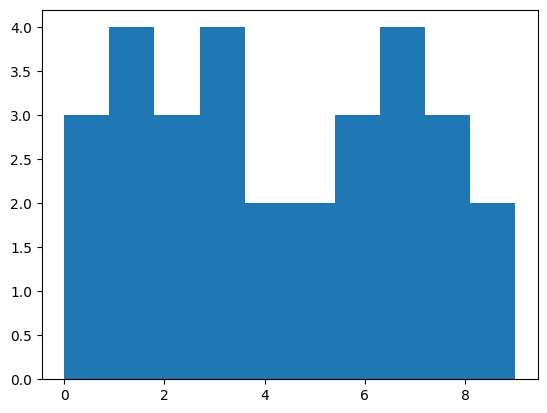

In [119]:
plt.hist(sample)
plt.show()

## Analyse af virkelige data

Gennemsnit og varians er meget vigtige, når man analyserer data fra den virkelige verden. Lad os indlæse data om baseballspillere fra [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Vi bruger en pakke kaldet [**Pandas**](https://pandas.pydata.org/) her til dataanalyse. Vi vil tale mere om Pandas og arbejde med data i Python senere i dette kursus.

Lad os beregne gennemsnitsværdier for alder, højde og vægt:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Lad os nu fokusere på højde og beregne standardafvigelse og varians:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Ud over gennemsnittet giver det mening at se på medianværdien og kvartilerne. De kan visualiseres ved hjælp af et **boksplot**:


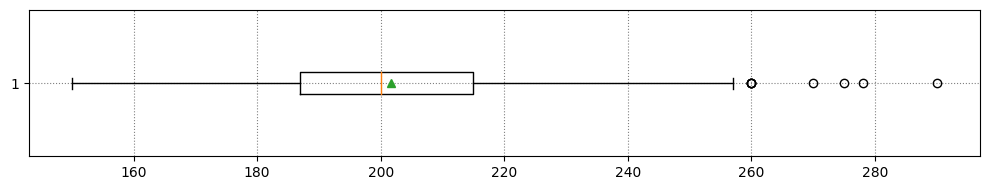

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Vi kan også lave boksdiagrammer af undergrupper af vores datasæt, for eksempel grupperet efter spillerrolle.


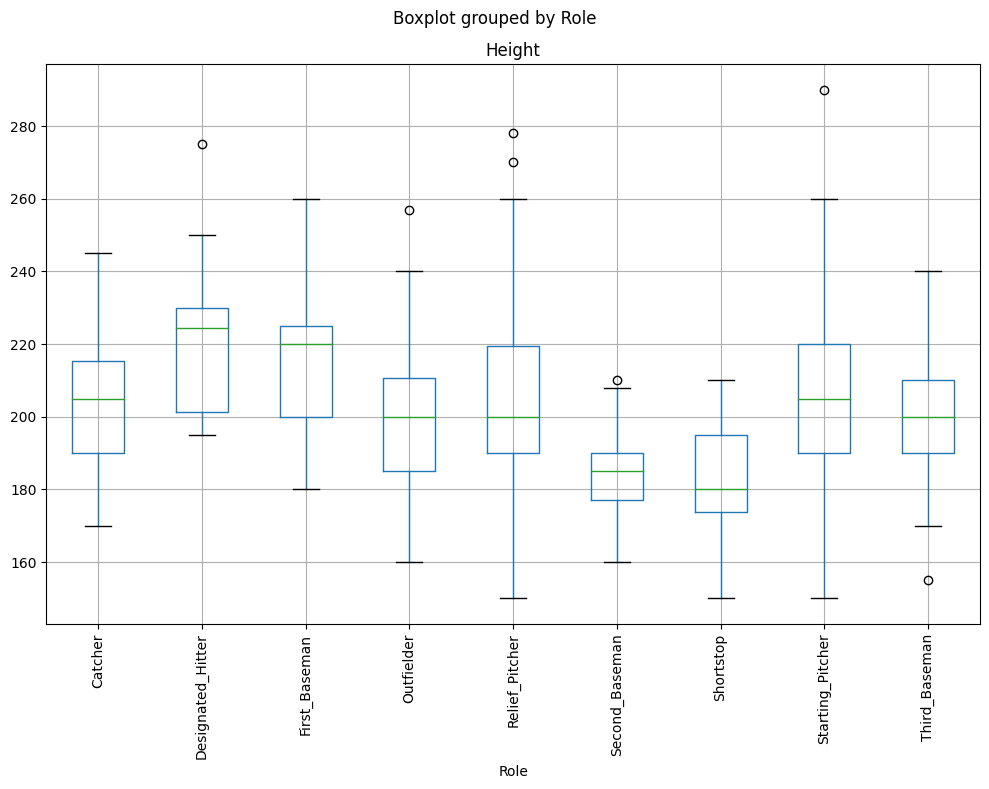

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Bemærk**: Dette diagram antyder, at gennemsnitligt set er førstebasemandens højde højere end andendebasemandens højde. Senere vil vi lære, hvordan vi mere formelt kan teste denne hypotese, og hvordan vi kan demonstrere, at vores data er statistisk signifikante for at understøtte dette.  

Alder, højde og vægt er alle kontinuerte stokastiske variable. Hvad tror du, deres fordeling er? En god måde at finde ud af det på er at lave et histogram over værdierne:


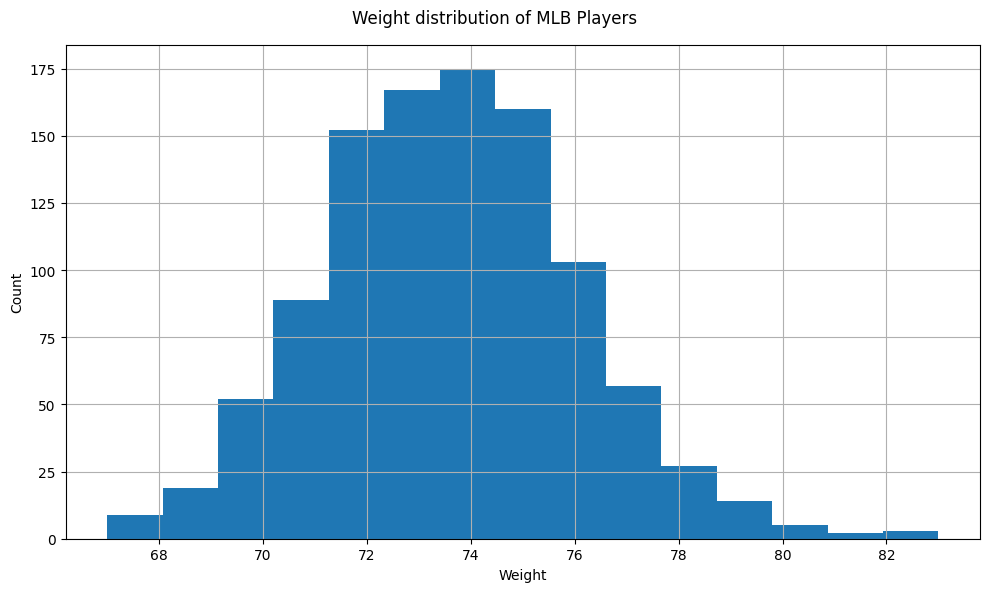

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normalfordeling

Lad os skabe et kunstigt vægtudvalg, der følger en normalfordeling med samme gennemsnit og varians som vores rigtige data:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

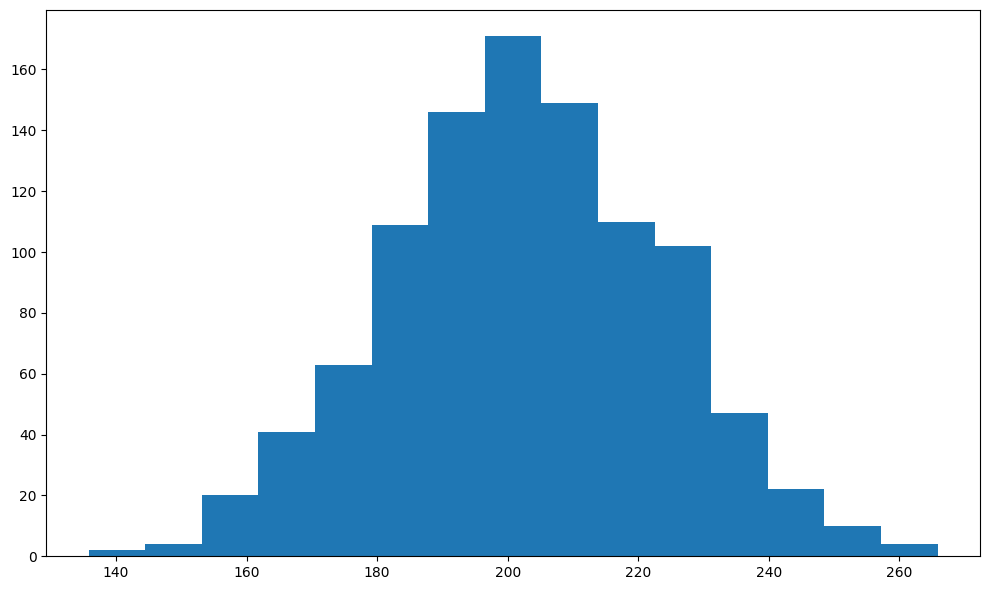

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

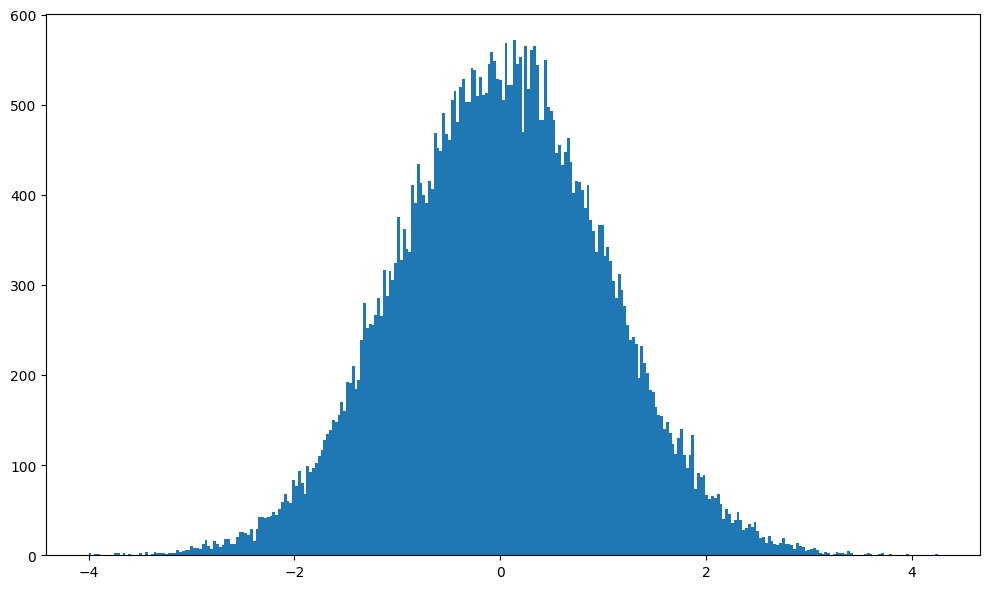

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Da de fleste værdier i det virkelige liv er normalfordelte, bør vi ikke bruge en ensartet tilfældig talgenerator til at generere prøvedata. Her er, hvad der sker, hvis vi forsøger at generere vægte med en ensartet fordeling (genereret af `np.random.rand`):


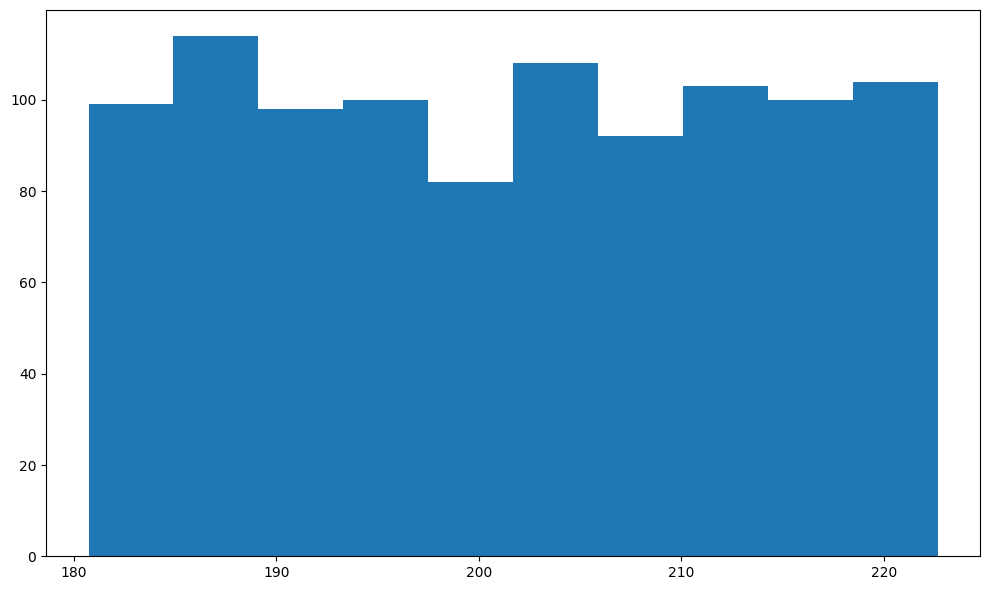

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Konfidensintervaller

Lad os nu beregne konfidensintervaller for vægten og højden af baseballspillere. Vi vil bruge koden [fra denne stackoverflow-diskussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Hypotesetestning

Lad os udforske de forskellige roller i vores dataset over baseballspillere:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Vi kan se, at intervallerne ikke overlapper.

En statistisk mere korrekt måde at bevise hypotesen på er at bruge en **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


De to værdier, der returneres af funktionen `ttest_ind`, er:
* p-værdien kan betragtes som sandsynligheden for, at to fordelinger har samme gennemsnit. I vores tilfælde er den meget lav, hvilket betyder, at der er stærke beviser for, at første basemen er højere.
* t-værdien er den mellemliggende værdi af den normaliserede gennemsnitsforskel, der bruges i t-testen, og den sammenlignes med en tærskelværdi for en given konfidensværdi.


## Simulering af en normalfordeling med den centrale grænseværdisætning

Den pseudo-tilfældige generator i Python er designet til at give os en ensartet fordeling. Hvis vi ønsker at skabe en generator for normalfordeling, kan vi bruge den centrale grænseværdisætning. For at få en normalfordelt værdi beregner vi blot gennemsnittet af en ensartet genereret stikprøve.


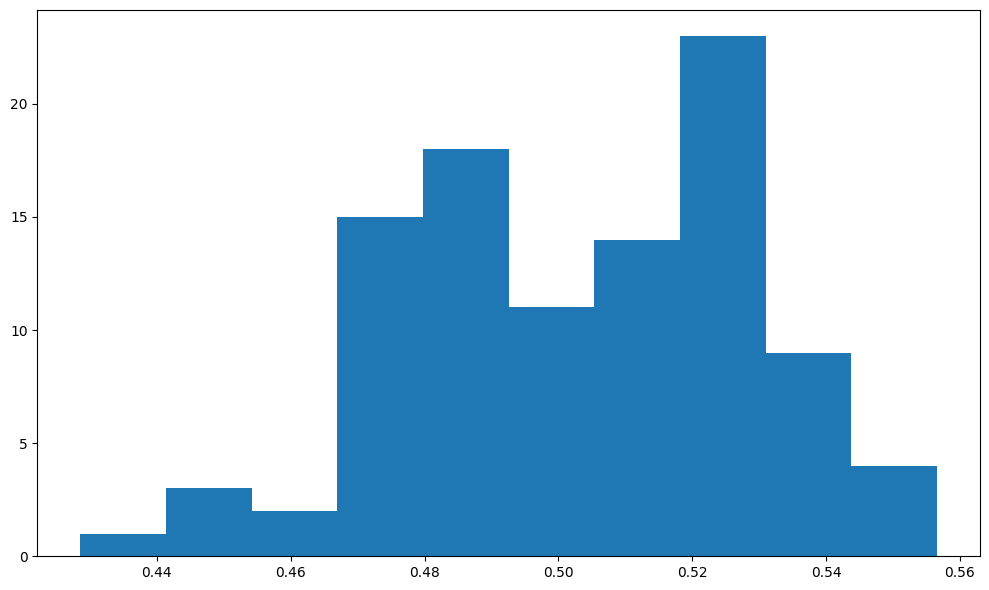

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korrelation og Ond Baseball Corp

Korrelation giver os mulighed for at finde relationer mellem datasæt. I vores simple eksempel, lad os forestille os, at der findes en ond baseballvirksomhed, som betaler sine spillere baseret på deres højde - jo højere spilleren er, desto mere penge får han/hun. Antag, at der er en grundløn på $1000 og en ekstra bonus fra $0 til $100, afhængigt af højden. Vi vil tage de rigtige spillere fra MLB og beregne deres imaginære løn:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Lad os nu beregne kovarians og korrelation af disse sekvenser. `np.cov` vil give os en såkaldt **kovariansmatrix**, som er en udvidelse af kovarians til flere variable. Elementet $M_{ij}$ i kovariansmatricen $M$ er en korrelation mellem inputvariablerne $X_i$ og $X_j$, og diagonalværdierne $M_{ii}$ er variansen af $X_{i}$. Tilsvarende vil `np.corrcoef` give os **korrelationsmatricen**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


En korrelation lig med 1 betyder, at der er en stærk **lineær relation** mellem to variable. Vi kan visuelt se den lineære relation ved at plotte den ene værdi mod den anden:


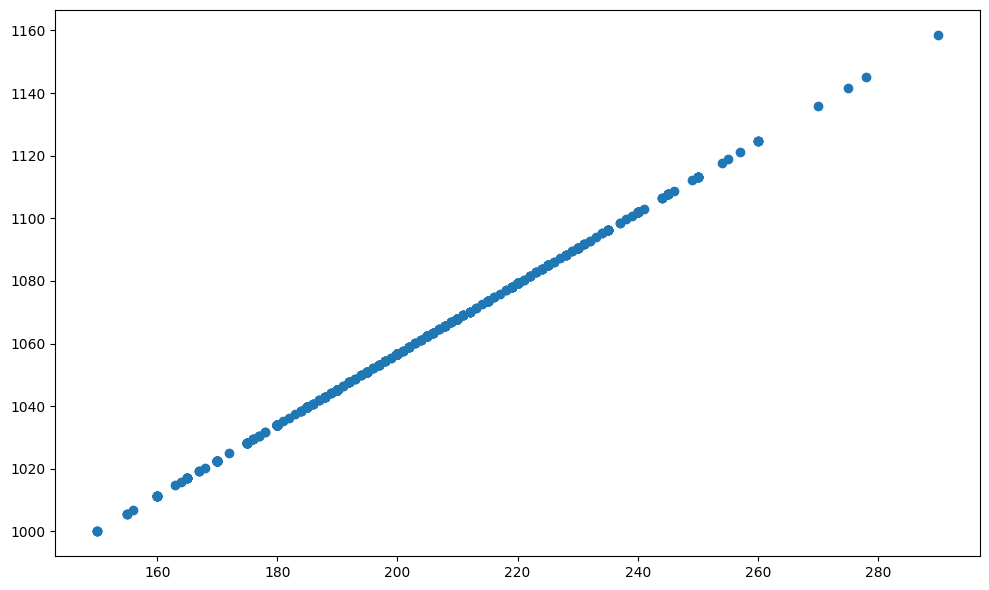

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Lad os se, hvad der sker, hvis relationen ikke er lineær. Antag, at vores virksomhed besluttede at skjule den åbenlyse lineære afhængighed mellem højder og lønninger og introducerede noget ikke-linearitet i formlen, såsom `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


I dette tilfælde er korrelationen lidt mindre, men den er stadig ret høj. Nu, for at gøre sammenhængen endnu mindre åbenlys, kunne vi overveje at tilføje lidt ekstra tilfældighed ved at tilføje en tilfældig variabel til lønnen. Lad os se, hvad der sker:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


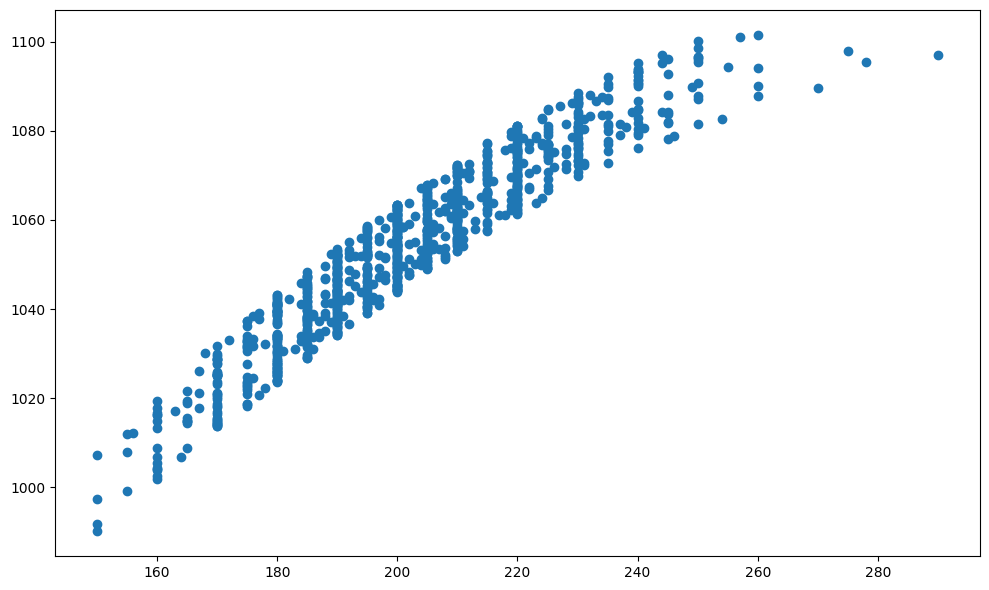

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Kan du gætte, hvorfor prikkerne danner lodrette linjer på denne måde?

Vi har observeret sammenhængen mellem et kunstigt konstrueret begreb som løn og den observerede variabel *højde*. Lad os også undersøge, om de to observerede variable, som højde og vægt, også korrelerer:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Desværre fik vi ingen resultater - kun nogle mærkelige `nan`-værdier. Dette skyldes, at nogle af værdierne i vores serie er udefinerede, repræsenteret som `nan`, hvilket gør, at resultatet af operationen også bliver udefineret. Ved at kigge på matricen kan vi se, at `Weight` er den problematiske kolonne, fordi selvkorrelationen mellem `Height`-værdierne er blevet beregnet.

> Dette eksempel viser vigtigheden af **databehandling** og **rensning**. Uden ordentlige data kan vi ikke beregne noget.

Lad os bruge metoden `fillna` til at udfylde de manglende værdier og beregne korrelationen:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Der er faktisk en korrelation, men ikke så stærk som i vores kunstige eksempel. Faktisk, hvis vi ser på spredningsdiagrammet af den ene værdi mod den anden, ville sammenhængen være meget mindre tydelig:


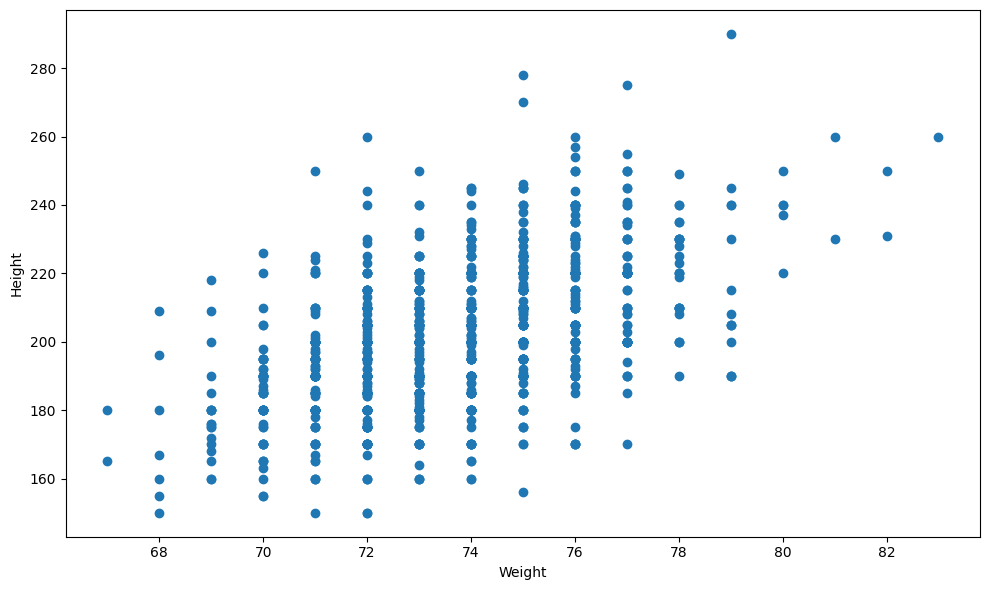

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Konklusion

I denne notebook har vi lært, hvordan man udfører grundlæggende operationer på data for at beregne statistiske funktioner. Vi ved nu, hvordan man anvender et solidt apparat af matematik og statistik til at bevise nogle hypoteser, og hvordan man beregner konfidensintervaller for vilkårlige variable givet et datasæt.



---

**Ansvarsfraskrivelse**:  
Dette dokument er blevet oversat ved hjælp af AI-oversættelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selvom vi bestræber os på nøjagtighed, skal du være opmærksom på, at automatiserede oversættelser kan indeholde fejl eller unøjagtigheder. Det originale dokument på dets oprindelige sprog bør betragtes som den autoritative kilde. For kritisk information anbefales professionel menneskelig oversættelse. Vi påtager os intet ansvar for misforståelser eller fejltolkninger, der måtte opstå som følge af brugen af denne oversættelse.
